# DataSet van RocketVsCarrots

## Adversarial Learning
Adversarial learning omvat het trainen van een model met zowel schone als adversarial voorbeelden om de robuustheid tegen aanvallen te verbeteren. Dit kan worden bereikt door verschillende methoden toe te passen, zoals het genereren van adversarial voorbeelden met behulp van aanvalstechnieken en deze vervolgens te gebruiken tijdens het trainen van het model.

Met aanvalstechnieken in de context van adversarial learning wordt verwezen naar methoden of algoritmen die worden gebruikt om adversarial voorbeelden te genereren. Deze technieken zijn ontworpen om subtiele wijzigingen aan te brengen in de invoerdata, zodat het resulterende voorbeeld wordt geclassificeerd op een manier die afwijkt van de normale classificatie door het model.

Enkele veelgebruikte aanvalstechnieken zijn onder andere:

1. Fast Gradient Sign Method (FGSM): Deze methode berekent de gradiënt van de kostenfunctie ten opzichte van de invoer en past vervolgens de resulterende gradiënt toe op de invoer met een kleine stapgrootte. Hierdoor ontstaat een verstoord voorbeeld dat in de buurt ligt van het originele voorbeeld maar dat door het model verkeerd kan worden geclassificeerd.

2. Projected Gradient Descent (PGD): Dit is een iteratieve versie van FGSM waarbij meerdere kleine stappen worden genomen om het voorbeeld geleidelijk te verstoren. Het maakt gebruik van een projectieoperatie om ervoor te zorgen dat de resulterende adversarial voorbeelden binnen een bepaalde afstand blijven van het originele voorbeeld.

3. DeepFool: Dit algoritme probeert het originele voorbeeld te verstoren door het te verplaatsen in de richting van een beslisgrens tussen klassen. Het probeert de kleinste perturbatie te vinden die nodig is om de classificatie van het model te veranderen.

4. Universal Adversarial Perturbations: Dit zijn perturbaties die kunnen worden toegepast op verschillende invoervoorbeelden om ze allemaal te misleiden. Ze worden berekend door het optimaliseren van de perturbatie op basis van een verzameling voorbeelden.

Deze zijn slechts enkele voorbeelden van aanvalstechnieken die worden gebruikt om adversarial voorbeelden te genereren. Het doel van deze technieken is om de zwakke punten van het model bloot te leggen en het model robuuster te maken tegen dergelijke aanvallen.


### Voorspelling
Ik denk dat adversarial learning zal helpen met het model trainen. Ik denk dat het model uiteindelijk meer patronen kan herkennen en hierdoor beter unieke data kan classificeren.

### Vorm van adversarial Learning

Er worden alleen de gegenereerde adversarial voorbeelden gebruikt in de adversarial_generator om het model te trainen. Hoewel het model wordt blootgesteld aan adversarial voorbeelden, wordt het niet volledig getraind met een combinatie van schone en adversarial voorbeelden. Daarom kunnen we zeggen dat de code het gebruik van adversarial voorbeelden in de training omvat, maar het is niet strikt een vorm van adversarial learning.



In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Set the directories for the training and validation data
train_dir = '../datasets/CarrortsVsRockets/train'
validation_dir = '../datasets/CarrortsVsRockets/val'

# Preprocess and augment the data
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.2, height_shift_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

# Load a pre-trained CNN model (VGG16) and add custom layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Generate adversarial examples
adversarial_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

adversarial_generator = adversarial_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Train the model with adversarial examples
model.fit_generator(
    adversarial_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Found 264 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Found 264 images belonging to 2 classes.


/var/folders/2p/m8pz9vjx3zn73ndc2lz_zb0w0000gn/T/ipykernel_74105/1027865101.py:44: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10


2023-06-12 23:19:22.228323: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 101s 11s/step - loss: 0.2959 - accuracy: 0.8826 - val_loss: 0.2673 - val_accuracy: 0.9286
Epoch 2/10
9/9 [==============================] - 116s 13s/step - loss: 0.0933 - accuracy: 0.9508 - val_loss: 0.1436 - val_accuracy: 0.9286
Epoch 3/10
9/9 [==============================] - 121s 13s/step - loss: 0.0389 - accuracy: 0.9886 - val_loss: 0.1880 - val_accuracy: 0.9286
Epoch 4/10
9/9 [==============================] - 124s 14s/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.2645 - val_accuracy: 0.9048
Epoch 5/10
9/9 [==============================] - 125s 14s/step - loss: 0.0143 - accuracy: 0.9962 - val_loss: 0.8970 - val_accuracy: 0.8095
Epoch 6/10
9/9 [==============================] - 128s 14s/step - loss: 3.9500e-04 - accuracy: 1.0000 - val_loss: 0.4076 - val_accuracy: 0.9286
Epoch 7/10
9/9 [==============================] - 120s 15s/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.5803 - val_accuracy: 0.8810
Epoch 8/10
9/9 [===========

Een accuracy van 1.000 dit zal hoogs waarschijnlijk betekenen dat het model overfitting heeft. Hierdoor zal het model minder goed presteren op nieuwe data.

In [33]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Get the predictions for the validation set
predictions = model.predict(validation_generator)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Get the filenames of the validation set
filenames = validation_generator.filenames

# Get the indices of the misclassified images
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Calculate the accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Print the number of misclassified images
print('Number of misclassified images: ', len(misclassified_indices))
print('Accuracy: ', accuracy)

2/2 [==============================] - 5s 1s/step
Number of misclassified images:  18
Accuracy:  0.5714285714285714


0.57 als accuracy dit laat zien dat het model inderdaad overfitting heeft. In vergelijking met de trainingAccuracy.

# Adversarial Learning
Deze code voert een vorm van adversarial learning uit met behulp van de Fast Gradient Sign Method (FGSM) om adversarial voorbeelden te genereren en het model te trainen met deze voorbeelden. Hier is wat er gebeurt in de code:

1. De code importeert de vereiste TensorFlow- en Keras-modules.

2. De mappen voor de trainings- en validatiegegevens worden ingesteld.

3. De gegevens worden gepreprocessd en aangepast met behulp van `ImageDataGenerator` van Keras om data-augmentatie toe te passen.

4. Er wordt een VGG16-model geladen dat is voorgetraind op het 'imagenet'-dataset. Aangepaste lagen worden toegevoegd aan het model.

5. Het model wordt gecompileerd met behulp van de Adam-optimizer, de binair-kruisentropie-verliesfunctie en nauwkeurigheid als metriek.

6. Adversarial voorbeelden worden gegenereerd met behulp van FGSM. Het model wordt gebruikt om de adversarial voorbeelden te genereren op basis van de invoerbeelden uit de trainingsdirectory.

7. De originele en gegenereerde adversarial voorbeelden worden samengevoegd tot een nieuwe trainingsset, samen met hun bijbehorende labels.

8. Het model wordt getraind met de samengevoegde trainingsset, inclusief zowel de originele als de adversarial voorbeelden. Het aantal epochs is ingesteld op 5.

Met deze aanpak kan het model leren om robuuster te worden tegen adversarial voorbeelden door te trainen met zowel schone als adversarial voorbeelden.

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method

# Set the directories for the training and validation data
train_dir = '../datasets/CarrortsVsRockets/train'
validation_dir = '../datasets/CarrortsVsRockets/val'

# Preprocess and augment the data
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.2, height_shift_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

# Load a pre-trained CNN model (VGG16) and add custom layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Generate adversarial examples using FGSM
epsilon = 0.05  # Perturbation magnitude for FGSM
adversarial_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
adversarial_flow = adversarial_generator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

adversarial_images, adversarial_labels = adversarial_flow.next()
adversarial_images = fast_gradient_method(model, adversarial_images, epsilon, np.inf, targeted=False)

# Concatenate original and adversarial examples
train_images = np.concatenate([train_generator[0][0], adversarial_images])
train_labels = np.concatenate([train_generator[0][1], adversarial_labels])

# Train the model with adversarial examples
model.fit(train_images, train_labels, epochs=5, validation_data=validation_generator)


Found 264 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Found 264 images belonging to 2 classes.
Epoch 1/5
2/2 [==============================] - 30s 17s/step - loss: 0.8071 - accuracy: 0.5000 - val_loss: 0.4874 - val_accuracy: 0.7381
Epoch 2/5
2/2 [==============================] - 31s 19s/step - loss: 0.2902 - accuracy: 0.8906 - val_loss: 0.2417 - val_accuracy: 0.8810
Epoch 3/5
2/2 [==============================] - 32s 19s/step - loss: 0.1045 - accuracy: 0.9844 - val_loss: 0.2116 - val_accuracy: 0.8810
Epoch 4/5
2/2 [==============================] - 33s 20s/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.5083 - val_accuracy: 0.9286
Epoch 5/5
2/2 [==============================] - 35s 20s/step - loss: 0.0234 - accuracy: 0.9844 - val_loss: 0.5084 - val_accuracy: 0.8810


Uit de gegeven output kunnen we enkele conclusies trekken:

1. Trainingsresultaten: Het model behaalde tijdens de training een lage trainingsverlieswaarde van 0.0234 en een hoge trainingsnauwkeurigheid van 98.44%. Dit geeft aan dat het model goed heeft gepresteerd op de trainingsgegevens en de trainingsvoorbeelden goed heeft kunnen classificeren.

2. Validatieresultaten: Tijdens de validatie behaalde het model een valideringsverlieswaarde van 0.5084 en een valideringsnauwkeurigheid van 88.10%. Deze resultaten geven aan dat het model redelijk presteert op de valideringsgegevens, maar mogelijk iets minder nauwkeurig is dan tijdens de training. Dit kan wijzen op een bepaalde mate van overfitting, waarbij het model mogelijk specifieke kenmerken van de trainingsgegevens heeft geleerd die niet algemeen gelden.

3. Algehele prestatie: Het behalen van een hoge nauwkeurigheid tijdens de training en een redelijke nauwkeurigheid tijdens de validatie suggereert dat het model effectief is in het classificeren van de gegeven beelden. Het verschil in prestaties tussen de trainings- en validatiesets kan wijzen op enige mate van overfitting, wat betekent dat het model mogelijk minder goed presteert op nieuwe, ongeziene gegevens.

Over het algemeen kan worden geconcludeerd dat het model goede prestaties behaalde op de trainingsgegevens, maar dat er enige ruimte is voor verbetering om de algemene prestaties te optimaliseren en mogelijke overfitting te verminderen. Om overfitting te verminderen kunnen we kijken naar dropout of L2-regularisatie, om de robuustheid en generalisatie van het model te verbeteren.

## Plotten van de fout voorspelde images

2/2 [==============================] - 5s 1s/step
Accuracy:  0.5714285714285714
Number of misclassified images:  18


IndexError: index 18 is out of bounds for axis 0 with size 18

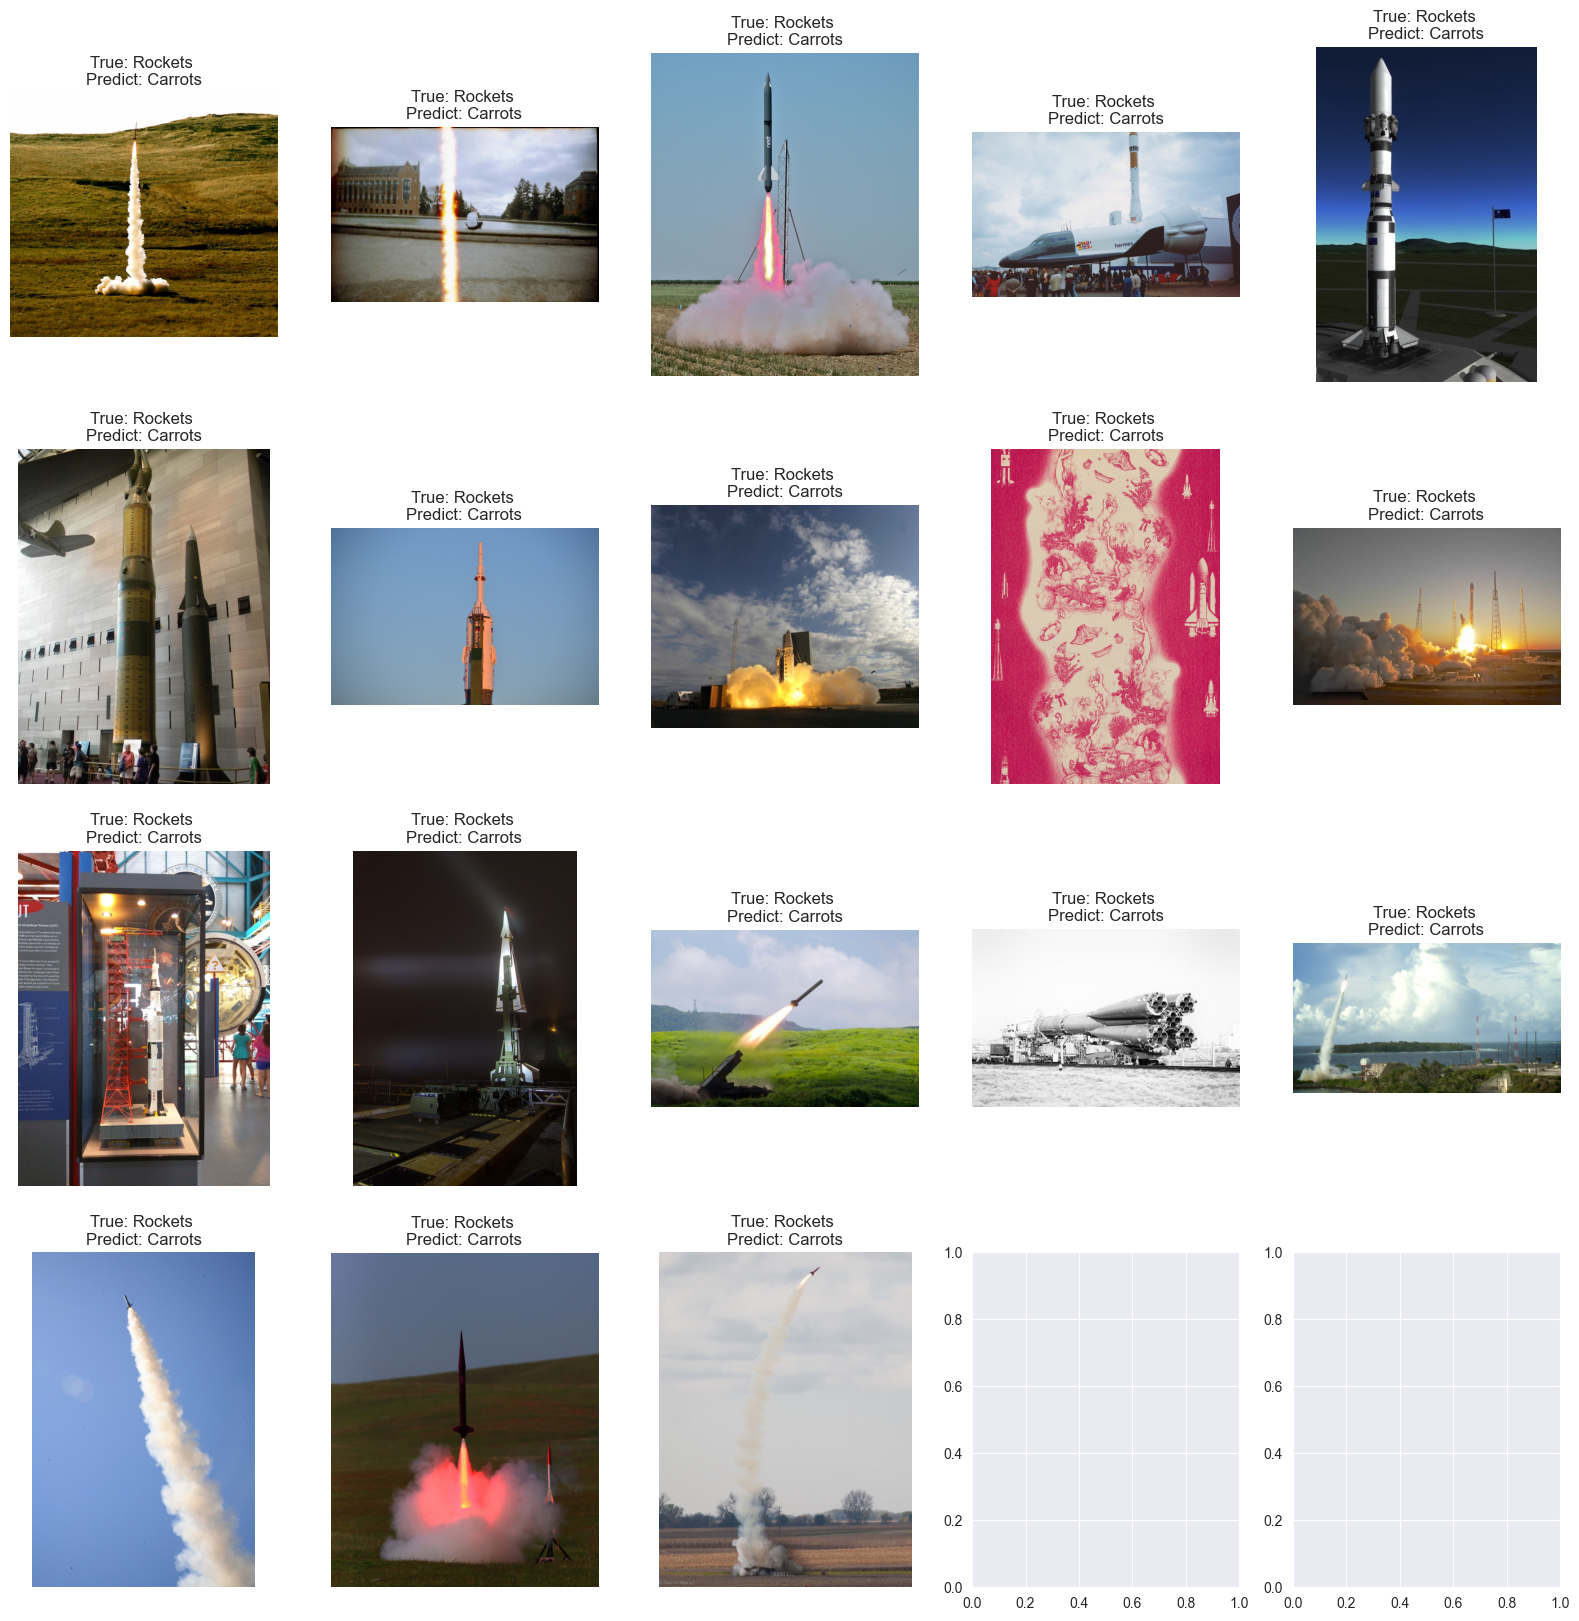

In [41]:
from sklearn.metrics import accuracy_score
import os
import numpy as np
import matplotlib.pyplot as plt

# Get the predictions for the validation set
predictions = model.predict(validation_generator)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Get the filenames of the validation set
filenames = validation_generator.filenames

# Get the indices of the misclassified images
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Calculate the accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print('Accuracy: ', accuracy)

# Print the number of misclassified images
print('Number of misclassified images: ', len(misclassified_indices))

# Plot the misclassified images
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
axes = axes.ravel()

for i in np.arange(0, 20):
    index = misclassified_indices[i]
    img_path = os.path.join(validation_dir, filenames[index])
    img = plt.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title("True: %s \nPredict: %s" % (class_labels[true_classes[index]],
                                                  class_labels[predicted_classes[index]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()


De Accuracy van dit model is precies hetzelfde als die van hiervoor. Dit laat zien dat allebei de modellen overfit zijn. De manier van trainen in het tweede model heeft uiteindelijk niet veel verschil gegeven, door de overfitting.